# Problem
### The problem associated with this dataset is to predict the forest cover type based on the given features. It is a multi-class classification problem where the goal is to classify each instance into one of the seven forest cover types.

# Different Cover Types
### Spruce/Fir - Evergreen trees commonly found in forests
### Lodgepole Pine - Have straight trunks and cone shaped crowns
### Ponderos Pine - Thick bark and long needles
### Cottonwood/Willow - These are commonly found near the water bodies
### Aspen - Unique trembling leaves and smooth bark
### Douglas fir - Evergreen trees with soft needles and distinctive cones
### Krummholz - Stunted or twisted growth form of trees found at high elevations

In [5]:
import pandas as pd # Importing the pandas library
import numpy as np # Importing the numpy library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plot
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [2]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\BHAVYA\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex


In [7]:
# Importing the dataset now
my_data_set = pd.read_csv("C:\\Users\\BHAVYA\\OneDrive\\Desktop\\Forest\\Forest_Cover_Dataset.csv")

In [8]:
# Printing first 10 rows of the data set
my_data_set.head(10)

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,wilderness_area1,wilderness_area2,wilderness_area3,...,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,class
0,2424,113,16,268,68,808,1260,0,0,0,...,0,0,0,0,0,0,0,0,0,Douglas_fir
1,3130,40,15,330,24,2279,1650,0,0,1,...,1,0,0,0,0,0,0,0,0,Lodgepole_Pine
2,3071,62,5,212,40,1321,2697,1,0,0,...,0,0,0,0,0,0,0,0,0,Lodgepole_Pine
3,3151,9,17,95,19,577,2029,0,1,0,...,0,0,0,0,0,0,0,0,0,Spruce_Fir
4,3139,74,3,283,9,2522,1463,1,0,0,...,0,0,0,0,0,0,0,0,0,Spruce_Fir
5,3089,328,7,175,7,242,1936,0,1,0,...,0,0,0,0,0,0,0,0,0,Spruce_Fir
6,3224,29,20,134,26,1052,1543,1,0,0,...,0,0,0,0,0,0,0,0,0,Ponderosa_Pine
7,2778,98,10,95,14,2863,240,0,0,1,...,0,0,0,0,0,0,0,0,0,Lodgepole_Pine
8,2822,348,21,60,9,2440,927,0,0,1,...,0,0,0,0,0,0,0,0,0,Lodgepole_Pine
9,2768,6,12,466,-19,721,789,0,0,1,...,0,0,0,0,0,0,0,0,0,Lodgepole_Pine


In [9]:
# Getting to know more about the dataset
my_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   elevation                           10001 non-null  int64 
 1   aspect                              10001 non-null  int64 
 2   slope                               10001 non-null  int64 
 3   horizontal_distance_to_hydrology    10001 non-null  int64 
 4   Vertical_Distance_To_Hydrology      10001 non-null  int64 
 5   Horizontal_Distance_To_Roadways     10001 non-null  int64 
 6   Horizontal_Distance_To_Fire_Points  10001 non-null  int64 
 7   wilderness_area1                    10001 non-null  int64 
 8   wilderness_area2                    10001 non-null  int64 
 9   wilderness_area3                    10001 non-null  int64 
 10  wilderness_area4                    10001 non-null  int64 
 11  soil_type_1                         10001 non-null  in

# Information about the database
### Target Column - Class
### elevation   - The elevation of land measured in meters 
### aspect - The aspect of land measured in azimuth angle measured w.r.t sun
### slope - Measured in degrees
### horizontal_distance_to_hydrology - Horizontal Distance from nearest water source
### Vertical_Distance_To_Hydrology - Vertical Distance from nearest water source
### Horizontal_Distance_To_Roadways - Horizontal distance from roads
### Horizontal_Distance_To_Fire_Points - Related to forest fires
### wilderness_area1 to area4 - Related to the types of wild life present
### soil_type_1 to soil_type_40 - Related to the different types of soil

In [10]:
# Checking of NULL Values
my_data_set.isnull().sum()

elevation                             0
aspect                                0
slope                                 0
horizontal_distance_to_hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Horizontal_Distance_To_Fire_Points    0
wilderness_area1                      0
wilderness_area2                      0
wilderness_area3                      0
wilderness_area4                      0
soil_type_1                           0
soil_type_2                           0
soil_type_3                           0
soil_type_4                           0
soil_type_5                           0
soil_type_6                           0
soil_type_7                           0
soil_type_8                           0
soil_type_9                           0
soil_type_10                          0
soil_type_11                          0
soil_type_12                          0
soil_type_13                          0
soil_type_14                          0


In [11]:
# Getting to know the variation in our dataset in the target column
my_data_set["class"].value_counts()

class
Lodgepole_Pine       4621
Spruce_Fir           3563
Ponderosa_Pine        659
Krummholz             435
Douglas_fir           355
Aspen                 248
Cottonwood_Willow     120
Name: count, dtype: int64

In [12]:
my_data_set.describe()

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,wilderness_area1,wilderness_area2,wilderness_area3,...,soil_type_31,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,...,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.0000,10001.000000,10001.000000,10001.000000
mean,2960.542546,154.673033,14.121188,267.012299,46.408459,2333.747025,1969.249375,0.446355,0.050795,0.440156,...,0.042896,0.096790,0.076192,0.002100,0.003500,0.000300,0.0001,0.025897,0.022998,0.017998
std,279.650497,111.887733,7.474564,211.584881,57.930359,1536.500439,1313.107337,0.497139,0.219590,0.496431,...,0.202632,0.295687,0.265319,0.045778,0.059057,0.017318,0.0100,0.158837,0.149903,0.132951
min,1891.000000,0.000000,0.000000,0.000000,-147.000000,0.000000,30.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,2806.000000,57.000000,9.000000,108.000000,7.000000,1106.000000,1026.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
50%,3000.000000,125.000000,13.000000,216.000000,29.000000,1991.000000,1695.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
75%,3162.000000,260.000000,18.000000,384.000000,70.000000,3282.000000,2539.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
max,3814.000000,359.000000,60.000000,1356.000000,463.000000,6942.000000,7110.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000


In [13]:
num_data = my_data_set[["elevation","aspect","slope","horizontal_distance_to_hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points"]]

In [14]:
num_data

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points
0,2424,113,16,268,68,808,1260
1,3130,40,15,330,24,2279,1650
2,3071,62,5,212,40,1321,2697
3,3151,9,17,95,19,577,2029
4,3139,74,3,283,9,2522,1463
...,...,...,...,...,...,...,...
9996,2913,173,17,210,58,511,1040
9997,2928,349,14,0,0,1165,2287
9998,3329,165,13,997,213,2584,2242
9999,3135,111,20,649,-59,582,1116


In [15]:
cat_data = my_data_set.drop(["elevation","aspect","slope","horizontal_distance_to_hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points"],axis=1)
cat_data

,wilderness_area1,wilderness_area2,wilderness_area3,wilderness_area4,soil_type_1,soil_type_2,soil_type_3,soil_type_4,soil_type_5,soil_type_6,...,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,class
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Douglas_fir
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Lodgepole_Pine
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lodgepole_Pine
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Spruce_Fir
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Spruce_Fir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Aspen
9997,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Lodgepole_Pine
9998,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Spruce_Fir
9999,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lodgepole_Pine


C:\Users\BHAVYA\AppData\Local\Temp\ipykernel_13636\1961499829.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_data[column])
C:\Users\BHAVYA\AppData\Local\Temp\ipykernel_13636\1961499829.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_data[column])
C:\Users\BHAVYA\AppData\Local\Te

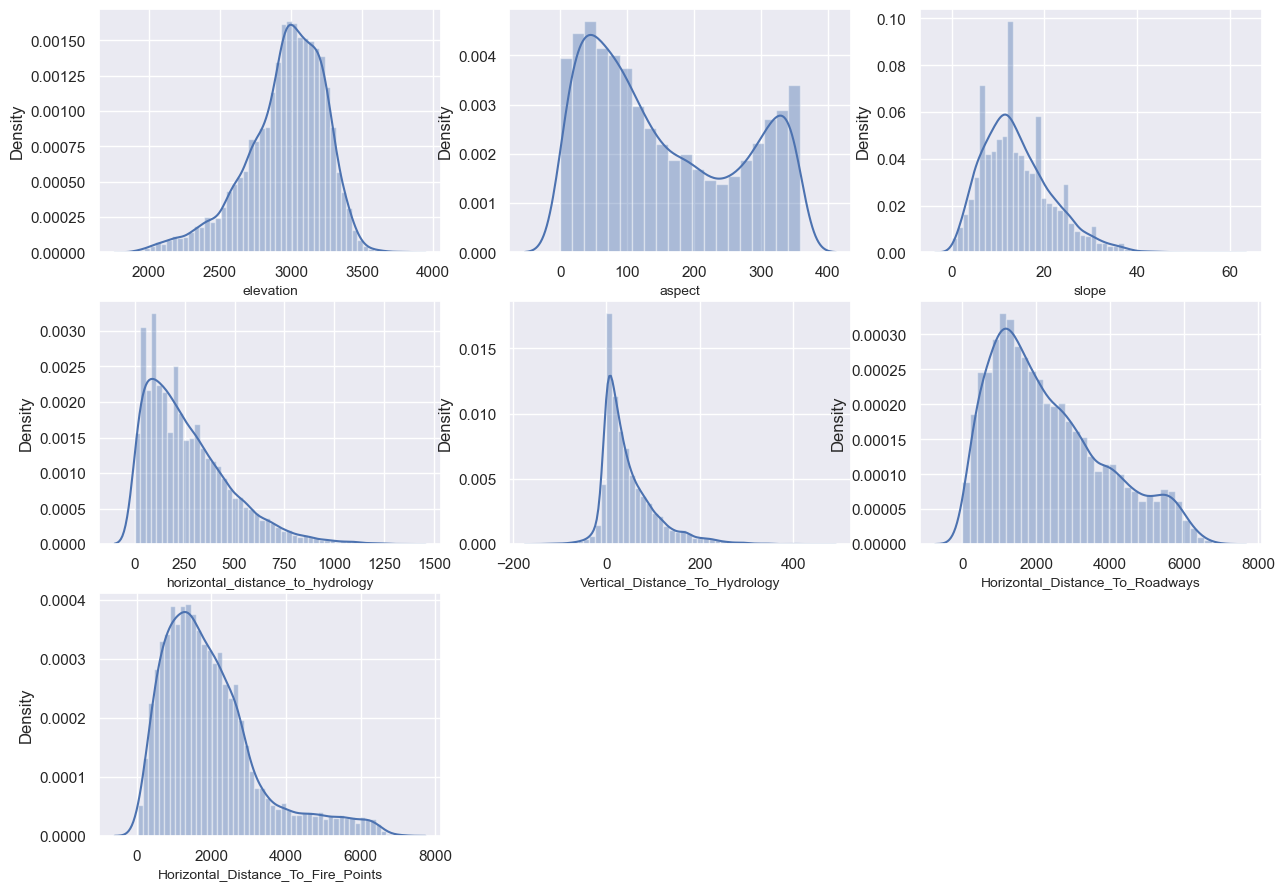

In [16]:
plot.figure(figsize=(15,60), facecolor='white')
plotnumber =1

for column in num_data:
    ax = plot.subplot(16,3,plotnumber)
    sns.distplot(num_data[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

In [17]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(num_data)
scaled_data
num_data1 = pd.DataFrame(scaled_data,columns=num_data.columns)
num_data1

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points
0,-1.918714,-0.372473,0.251373,0.004668,0.372734,-0.993051,-0.540158
1,0.605992,-1.024945,0.117580,0.297710,-0.386837,-0.035633,-0.243137
2,0.395004,-0.828309,-1.220358,-0.260014,-0.110629,-0.659159,0.554248
3,0.681089,-1.302022,0.385167,-0.813011,-0.473151,-1.143400,0.045506
4,0.638177,-0.721054,-1.487945,0.075565,-0.645781,0.122527,-0.385555
...,...,...,...,...,...,...,...
9996,-0.170016,0.163806,0.385167,-0.269467,0.200104,-1.186357,-0.707707
9997,-0.116374,1.736890,-0.016214,-1.262026,-0.801148,-0.760693,0.241996
9998,1.317630,0.092302,-0.150008,3.450266,2.875865,0.162880,0.207724
9999,0.623872,-0.390349,0.786548,1.805454,-1.819663,-1.140146,-0.649827


In [18]:
cat_data['class'].unique()

array(['Douglas_fir', 'Lodgepole_Pine', 'Spruce_Fir', 'Ponderosa_Pine',
       'Krummholz', 'Cottonwood_Willow', 'Aspen'], dtype=object)

In [19]:
cat_data["class"] = cat_data["class"].map({"Lodgepole_Pine" : 0, "Spruce_Fir" : 1,"Douglas_fir" :2,"Krummholz" : 3,"Ponderosa_Pine" : 4,"Aspen" :5,"Cottonwood_Willow" : 6})

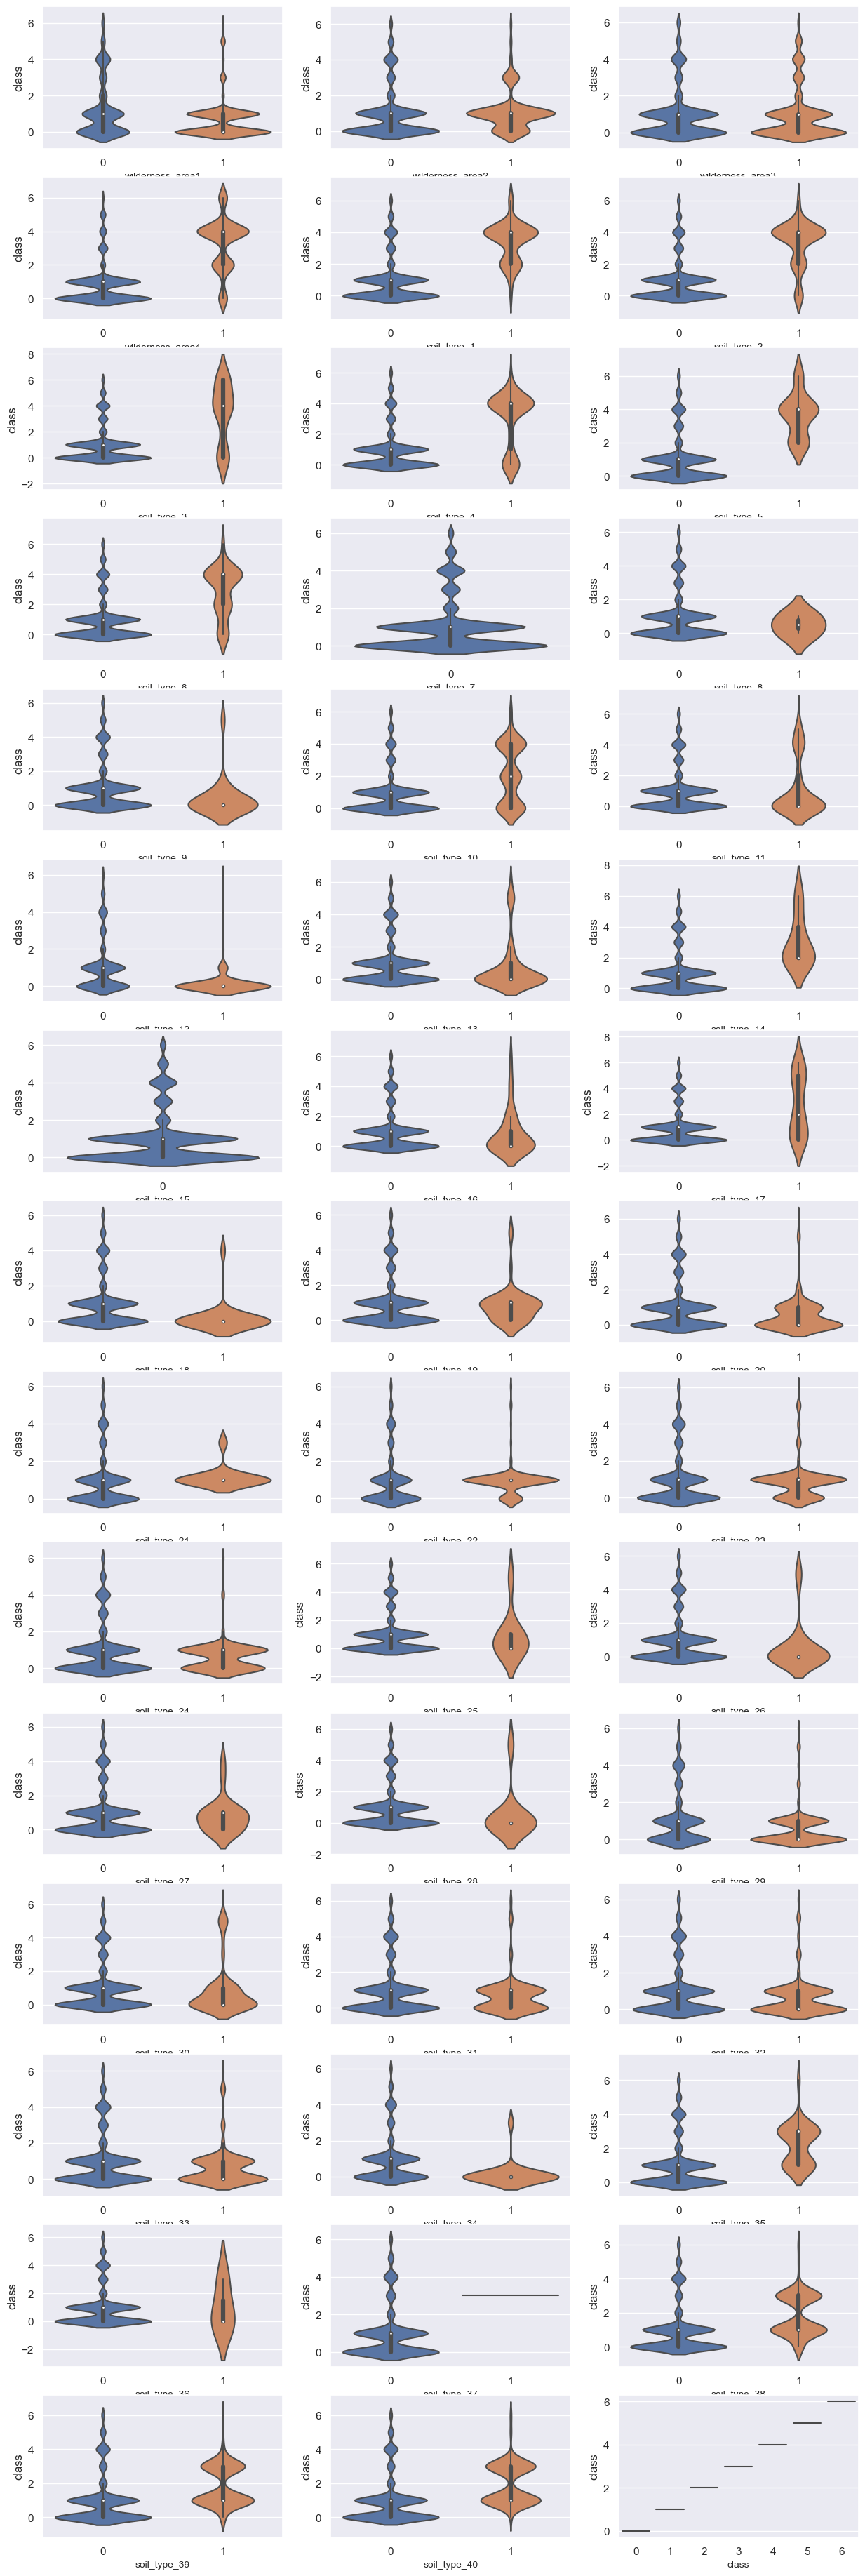

In [20]:
plot.figure(figsize=(15,50), facecolor='white')
plotnumber =1

for column in cat_data:
    ax = plot.subplot(16,3,plotnumber)
    sns.violinplot(data= cat_data,x=cat_data[column],y =cat_data['class'] )
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

In [21]:
final_data = pd.concat([num_data1,cat_data],axis=1)
final_data

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,wilderness_area1,wilderness_area2,wilderness_area3,...,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,class
0,-1.918714,-0.372473,0.251373,0.004668,0.372734,-0.993051,-0.540158,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0.605992,-1.024945,0.117580,0.297710,-0.386837,-0.035633,-0.243137,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,0.395004,-0.828309,-1.220358,-0.260014,-0.110629,-0.659159,0.554248,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.681089,-1.302022,0.385167,-0.813011,-0.473151,-1.143400,0.045506,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.638177,-0.721054,-1.487945,0.075565,-0.645781,0.122527,-0.385555,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,-0.170016,0.163806,0.385167,-0.269467,0.200104,-1.186357,-0.707707,0,0,1,...,0,0,0,0,0,0,0,0,0,5
9997,-0.116374,1.736890,-0.016214,-1.262026,-0.801148,-0.760693,0.241996,0,0,1,...,1,0,0,0,0,0,0,0,0,0
9998,1.317630,0.092302,-0.150008,3.450266,2.875865,0.162880,0.207724,0,0,1,...,0,1,0,0,0,0,0,0,0,1
9999,0.623872,-0.390349,0.786548,1.805454,-1.819663,-1.140146,-0.649827,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X = final_data.drop(['class'],axis=1)
y = my_data_set['class']

In [23]:
X

,elevation,aspect,slope,horizontal_distance_to_hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,wilderness_area1,wilderness_area2,wilderness_area3,...,soil_type_31,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40
0,-1.918714,-0.372473,0.251373,0.004668,0.372734,-0.993051,-0.540158,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.605992,-1.024945,0.117580,0.297710,-0.386837,-0.035633,-0.243137,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0.395004,-0.828309,-1.220358,-0.260014,-0.110629,-0.659159,0.554248,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.681089,-1.302022,0.385167,-0.813011,-0.473151,-1.143400,0.045506,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.638177,-0.721054,-1.487945,0.075565,-0.645781,0.122527,-0.385555,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,-0.170016,0.163806,0.385167,-0.269467,0.200104,-1.186357,-0.707707,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9997,-0.116374,1.736890,-0.016214,-1.262026,-0.801148,-0.760693,0.241996,0,0,1,...,0,1,0,0,0,0,0,0,0,0
9998,1.317630,0.092302,-0.150008,3.450266,2.875865,0.162880,0.207724,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9999,0.623872,-0.390349,0.786548,1.805454,-1.819663,-1.140146,-0.649827,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y

0           Douglas_fir
1        Lodgepole_Pine
2        Lodgepole_Pine
3            Spruce_Fir
4            Spruce_Fir
              ...      
9996              Aspen
9997     Lodgepole_Pine
9998         Spruce_Fir
9999     Lodgepole_Pine
10000    Lodgepole_Pine
Name: class, Length: 10001, dtype: object

In [25]:
sample = SMOTE()
X,y = sample.fit_resample(X,y)

In [26]:
# Here we are diving our dataset into the training and testing set in ratio of 70:30
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [27]:
X_train.shape

(22642, 51)

In [28]:
X_test.shape

(9705, 51)

In [29]:
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_predicted = logr.predict(X_test)

C:\Users\BHAVYA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
y_predicted # Predicted values

array(['Spruce_Fir', 'Douglas_fir', 'Krummholz', ..., 'Krummholz',
       'Aspen', 'Spruce_Fir'], dtype=object)

In [31]:
accuracy_score(y_test,y_predicted) # Here we are getting 46.5% accuracy which is not good

0.5637300360638846

In [32]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_predicted1 = dtc.predict(X_test)
print(y_predicted1)
print(accuracy_score(y_test,y_predicted1)) # Here we are getting better accuracy than the logistic regression

['Aspen' 'Douglas_fir' 'Krummholz' ... 'Spruce_Fir' 'Douglas_fir'
 'Krummholz']
0.8102009273570324


In [33]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_predicted2 = rfc.predict(X_test)
accuracy_score(y_test,y_predicted2) # Here we are getting the best accuracy out of the 3 models and hence we select this

0.9081916537867079

In [34]:
my_data_set.iloc[5].values

array([3089, 328, 7, 175, 7, 242, 1936, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'Spruce_Fir'], dtype=object)

In [35]:
user_input = (3089, 328, 7, 175, 7, 242, 1936, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
features = np.array([user_input])
rfc.predict(features).reshape(1,-1)

C:\Users\BHAVYA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([['Spruce_Fir']], dtype=object)

In [40]:
import pickle
pickle.dump(rfc,open("Model_for_forest_cover.pkl",'wb'))